<a href="https://colab.research.google.com/github/Farhanramazainn/FarhanR_MachLearn/blob/main/FarhanR_MachLearn_Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : FARHAN RAMAZAIN

KELAS : TI-3G

NIM : 2141720209

LinkGithub:

**Job Sheet 7: Clustering**

**Praktikum 1**

**KMeans**

Pada modul jobsheet ini, kita akan langsung mempraktikkan pembuatan model KMeans dengan menggunakan python. Untuk modul pertama ini, kita akan menggunakan contoh kasus yang sederhana, yaitu dengan menggunakan dataset iris. Sedangkan untuk modul kedua, kita akan melakukan clustering dengan lebih advance, yaitu reduksi warna dengan data gambar

Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Persiapan Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris (1).csv to Iris (1).csv


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Iris (1).csv'])) # load dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

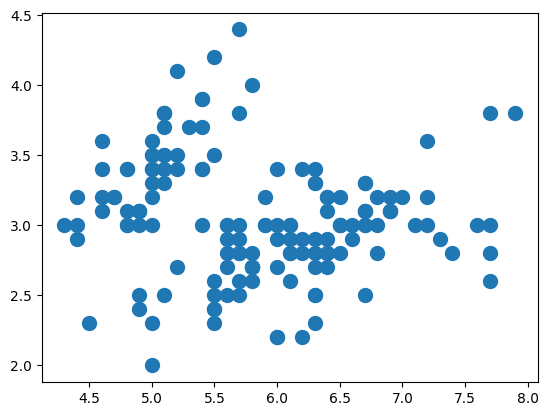

In [5]:
import matplotlib.pyplot as plt

# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


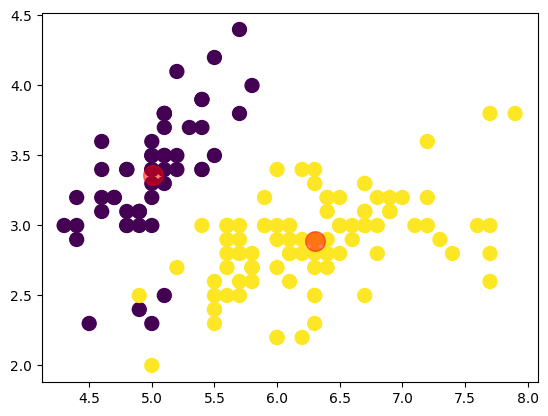

In [6]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [7]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733906


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

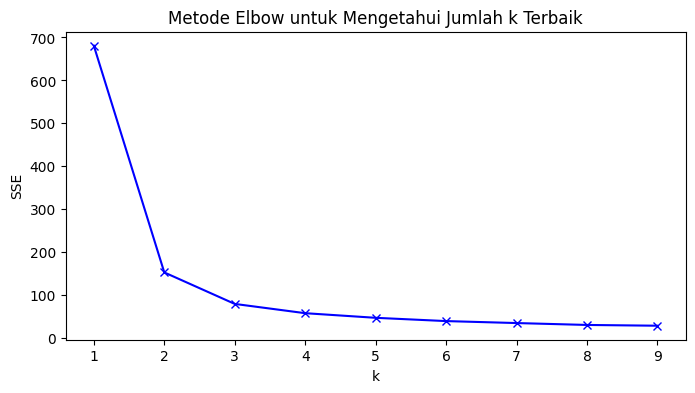

In [8]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [9]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8244000000001
k=2; SSE=152.36870647733906
k=3; SSE=78.940841426146
k=4; SSE=57.317873214285704
k=5; SSE=46.56163015873016
k=6; SSE=38.930963049671746
k=7; SSE=34.332858416945385
k=8; SSE=29.91463344988346
k=9; SSE=28.115534535639807


**Praktikum 2**

**onsep K-Means untuk klasterisasi data**

Import Library

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

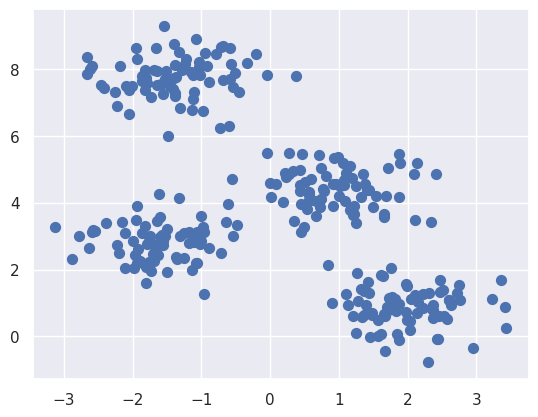

In [11]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


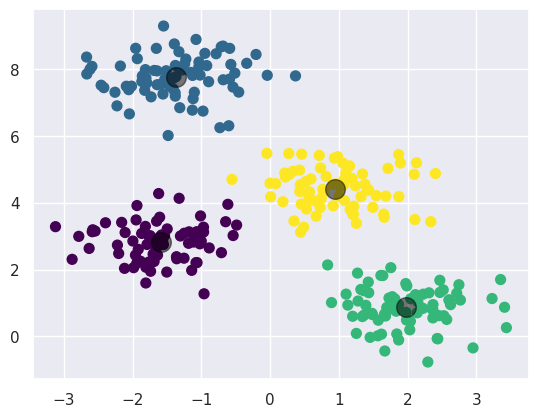

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

**Algoritma Expectation-Maximization**

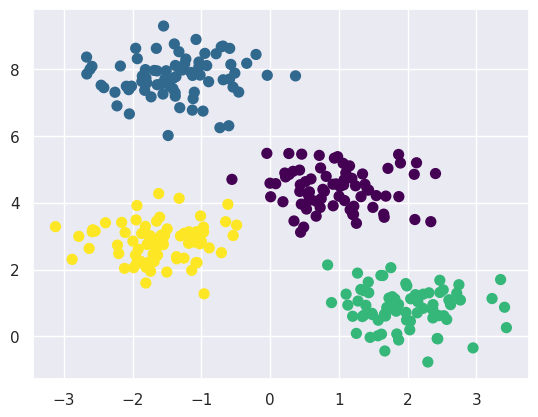

In [13]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**Perubahan Random**

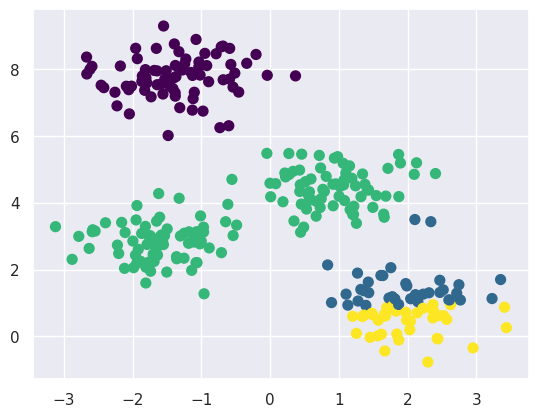

In [14]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**Optimalisasi Jumlah Klaster**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


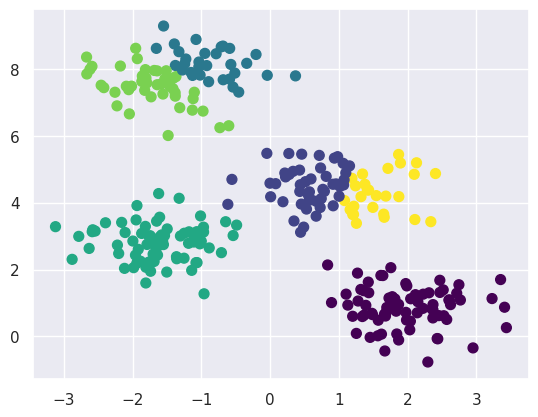

In [15]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**Batas Klaster yang Tidak Selalu Linier**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


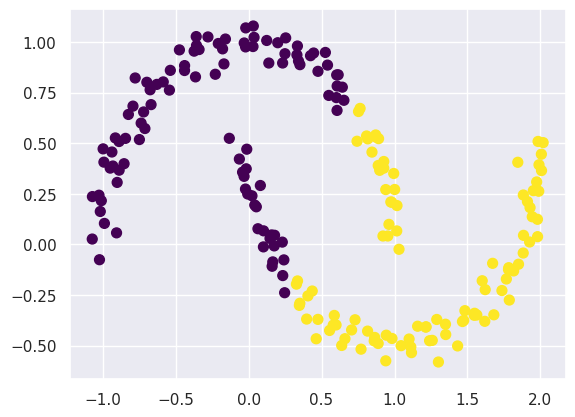

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


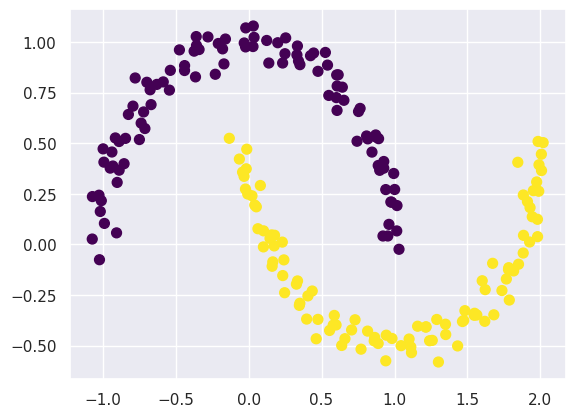

In [17]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**Contoh Kasus 1: Karakter Angka**

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [19]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

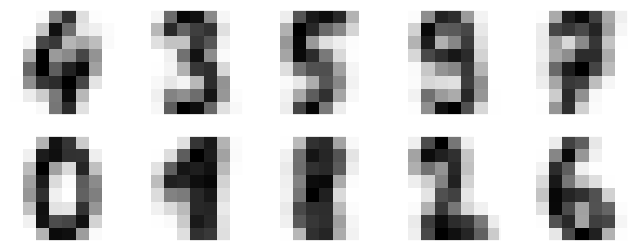

In [20]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [21]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

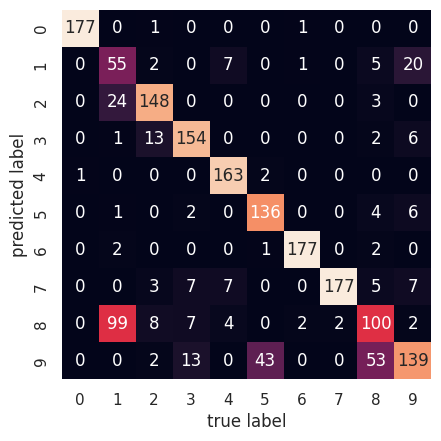

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [23]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.9415692821368948

**Studi Kasus 2: Kompresi Citra**

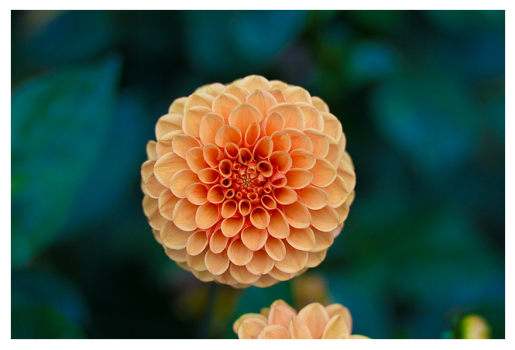

In [24]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [25]:
flower.shape

(427, 640, 3)

In [26]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [28]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

    plot_pixels(data, title='Input color space: 16 million possible colors')

**Praktikum 3**

**Self-optimizing Map (SOM)**